In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

# 1- Data Preperation

In [3]:
ps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS1.txt")

In [4]:
ps1

array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
       [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
       [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
       ...,
       [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
       [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
       [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]])

In [5]:
ps1.shape

(2205, 6000)

In [6]:
np.isnan(ps1).sum()

0

In [7]:
ps2=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS2.txt")

In [8]:
ps3=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS3.txt")

In [9]:
ps4=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS4.txt")

In [10]:
ps5=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS5.txt")

In [11]:
ps6=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS6.txt")

In [12]:
ps2

array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
       [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
       [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
       ...,
       [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
       [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
       [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]])

In [13]:
ps1_arr=ps1.mean(axis=1)
ps1_arr

array([160.67349167, 160.60332   , 160.34772   , ..., 161.19212   ,
       161.20891667, 161.21712833])

In [14]:
ps2_arr=ps2.mean(axis=1)
ps2_arr

array([109.4669135 , 109.35489033, 109.15884467, ..., 109.75617433,
       109.79388383, 109.7921765 ])

In [15]:
ps3_arr=ps3.mean(axis=1)
ps3_arr

array([1.99147533, 1.97623433, 1.972224  , ..., 1.99343617, 2.00707683,
       2.00269017])

In [16]:
ps4_arr=ps4.mean(axis=1)
ps4_arr

array([ 0.        ,  0.        ,  0.        , ..., 10.19682367,
       10.19858833, 10.20312583])

In [17]:
ps5_arr=ps5.mean(axis=1)
ps5_arr

array([9.8421695 , 9.63514217, 9.53054783, ..., 9.96432917, 9.96823183,
       9.97363767])

In [18]:
ps6_arr=ps6.mean(axis=1)
ps6_arr

array([9.7280975 , 9.52948783, 9.42794883, ..., 9.8426285 , 9.84668967,
       9.85194917])

In [19]:
df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [20]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


In [21]:
eps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/EPS1.txt")

In [22]:
esp1_arr=eps1.mean(axis=1)
esp1_arr

array([2538.92916667, 2531.4989    , 2519.928     , ..., 2542.72976667,
       2544.04633333, 2543.8183    ])

In [23]:
df["ESP1"]=esp1_arr

In [24]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500


In [25]:
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

In [26]:
fs1_arr=fs1.mean(axis=1)
fs1_arr

array([6.709815  , 6.715315  , 6.71852167, ..., 6.69327667, 6.68412833,
       6.69230167])

In [27]:
fs2_arr=fs2.mean(axis=1)
fs2_arr

array([10.30459167, 10.40309833, 10.36625   , ..., 10.17617167,
       10.17835333, 10.18339333])

In [28]:
df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [29]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750


In [30]:
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

In [31]:
ts1_arr=ts1.mean(axis=1)
ts1_arr

array([35.62198333, 36.67696667, 37.8808    , ..., 35.31918333,
       35.32476667, 35.32223333])

In [32]:
ts2_arr=ts2.mean(axis=1)
ts2_arr

array([40.97876667, 41.53276667, 42.44245   , ..., 40.87595   ,
       40.87606667, 40.8594    ])

In [33]:
ts3_arr=ts3.mean(axis=1)
ts3_arr

array([38.47101667, 38.97896667, 39.63195   , ..., 38.24636667,
       38.24573333, 38.24891667])

In [34]:
ts4_arr=ts4.mean(axis=1)
ts4_arr

array([31.74525   , 34.49386667, 35.64615   , ..., 30.42625   ,
       30.41428333, 30.3908    ])

In [35]:
df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [36]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900


In [37]:
vs1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/VS1.txt")

In [38]:
vs1

array([[0.604, 0.605, 0.611, ..., 0.545, 0.535, 0.543],
       [0.59 , 0.61 , 0.626, ..., 0.533, 0.531, 0.534],
       [0.578, 0.603, 0.638, ..., 0.544, 0.53 , 0.534],
       ...,
       [0.566, 0.562, 0.561, ..., 0.512, 0.515, 0.517],
       [0.529, 0.539, 0.552, ..., 0.522, 0.52 , 0.528],
       [0.541, 0.553, 0.565, ..., 0.522, 0.522, 0.531]])

In [39]:
vs1_arr=vs1.mean(axis=1)
vs1_arr

array([0.57695   , 0.56585   , 0.57653333, ..., 0.54523333, 0.53701667,
       0.54658333])

In [40]:
df["VS1"]=vs1_arr

In [41]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367


In [42]:
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(C)
ce,cp=a

In [43]:
ce_arr=ce.mean(axis=1)
ce_arr

array([39.60135   , 25.78643333, 22.21823333, ..., 46.4723    ,
       46.54496667, 46.64793333])

In [44]:
cp_arr=cp.mean(axis=1)
cp_arr

array([1.86275   , 1.25555   , 1.11321667, ..., 2.1433    , 2.14848333,
       2.15705   ])

In [45]:
df["CE"]=ce_arr
df["CP"]=cp_arr

In [46]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467


In [47]:
se=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/SE.txt")

In [48]:
se_arr=se.mean(axis=1)
se_arr

array([59.15718333, 59.33561667, 59.54315   , ..., 59.13235   ,
       58.9708    , 59.0539    ])

In [49]:
df["SE"]=se_arr

In [50]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [51]:
target=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/profile.txt")

In [52]:
target

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [53]:
target.shape

(2205, 5)

In [54]:
df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [55]:
df_final=pd.concat([df,df_temp],axis=1)

In [56]:
df_final.head(20)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000e+00,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000e+00,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000e+00,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000e+00,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000e+00,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.000000e+00,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.000000e+00,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.000000e+00,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.000000e+00,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.000000e+00,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

In [58]:
df_final.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,73.836682,1.032883,0.449246,7.991933,...,8.107878,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2361.747267,2.018572,8.857513,35.313783,...,30.390800,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,2442.933467,6.391670,9.203397,36.237150,...,31.272567,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,2480.926633,6.576673,9.692270,44.836650,...,40.429050,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,2548.211467,6.657508,10.155008,54.104317,...,49.409500,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,2740.641000,6.722707,10.403098,57.899283,...,53.060417,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# 2- Data Analysis

In [59]:
df_final.var()

PS1                        22.084591
PS2                        24.866035
PS3                         0.063454
PS4                        18.312876
PS5                         0.332117
PS6                         0.302048
ESP1                     5451.855603
FS1                         1.066847
FS2                         0.201822
TS1                        63.871000
TS2                        54.704580
TS3                        55.530634
TS4                        65.737688
VS1                         0.003631
CE                        133.988270
CP                          0.077430
SE                         80.284993
Cooler_Condition         1796.330820
Valve_Condition           114.100893
Internal_Pump_Leakage       0.667869
Hydraulic_Accumulator     270.137114
Stable_Flag                 0.225408
dtype: float64

In [60]:
df_final.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,0.831429,-0.924036,-0.224179,0.176661,...,0.171001,0.442242,-0.044862,-0.065850,-0.943953,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,0.787771,-0.946450,-0.295798,0.250480,...,0.245184,0.503126,-0.119934,-0.137819,-0.957972,-0.075386,-0.098491,0.309810,-0.180580,-0.206720
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,-0.268738,0.921187,0.798910,-0.776377,...,-0.776001,-0.894019,0.697820,0.680701,0.884123,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.457372,0.198654,0.688770,-0.706899,...,-0.718159,-0.661116,0.814459,0.752728,0.125883,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
ESP1,0.831429,0.787771,-0.268738,0.457372,0.418587,0.419764,1.000000,-0.608338,0.325387,-0.371933,...,-0.377500,-0.077260,0.475030,0.433904,-0.677823,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,-0.924036,-0.946450,0.921187,0.198654,0.461261,0.460014,-0.608338,1.000000,0.545412,-0.505347,...,-0.500738,-0.710475,0.376376,0.382178,0.994564,0.330446,0.190141,-0.421702,0.092695,0.288568
FS2,-0.224179,-0.295798,0.798910,0.688770,0.979715,0.979356,0.325387,0.545412,1.000000,-0.994654,...,-0.991432,-0.921744,0.919353,0.876955,0.466177,0.881340,0.038651,-0.034926,-0.139471,0.055942
TS1,0.176661,0.250480,-0.776377,-0.706899,-0.992716,-0.992523,-0.371933,-0.505347,-0.994654,1.000000,...,0.999242,0.913102,-0.945977,-0.912048,-0.423296,-0.910865,-0.023876,0.019793,0.193597,-0.029021


<AxesSubplot:>

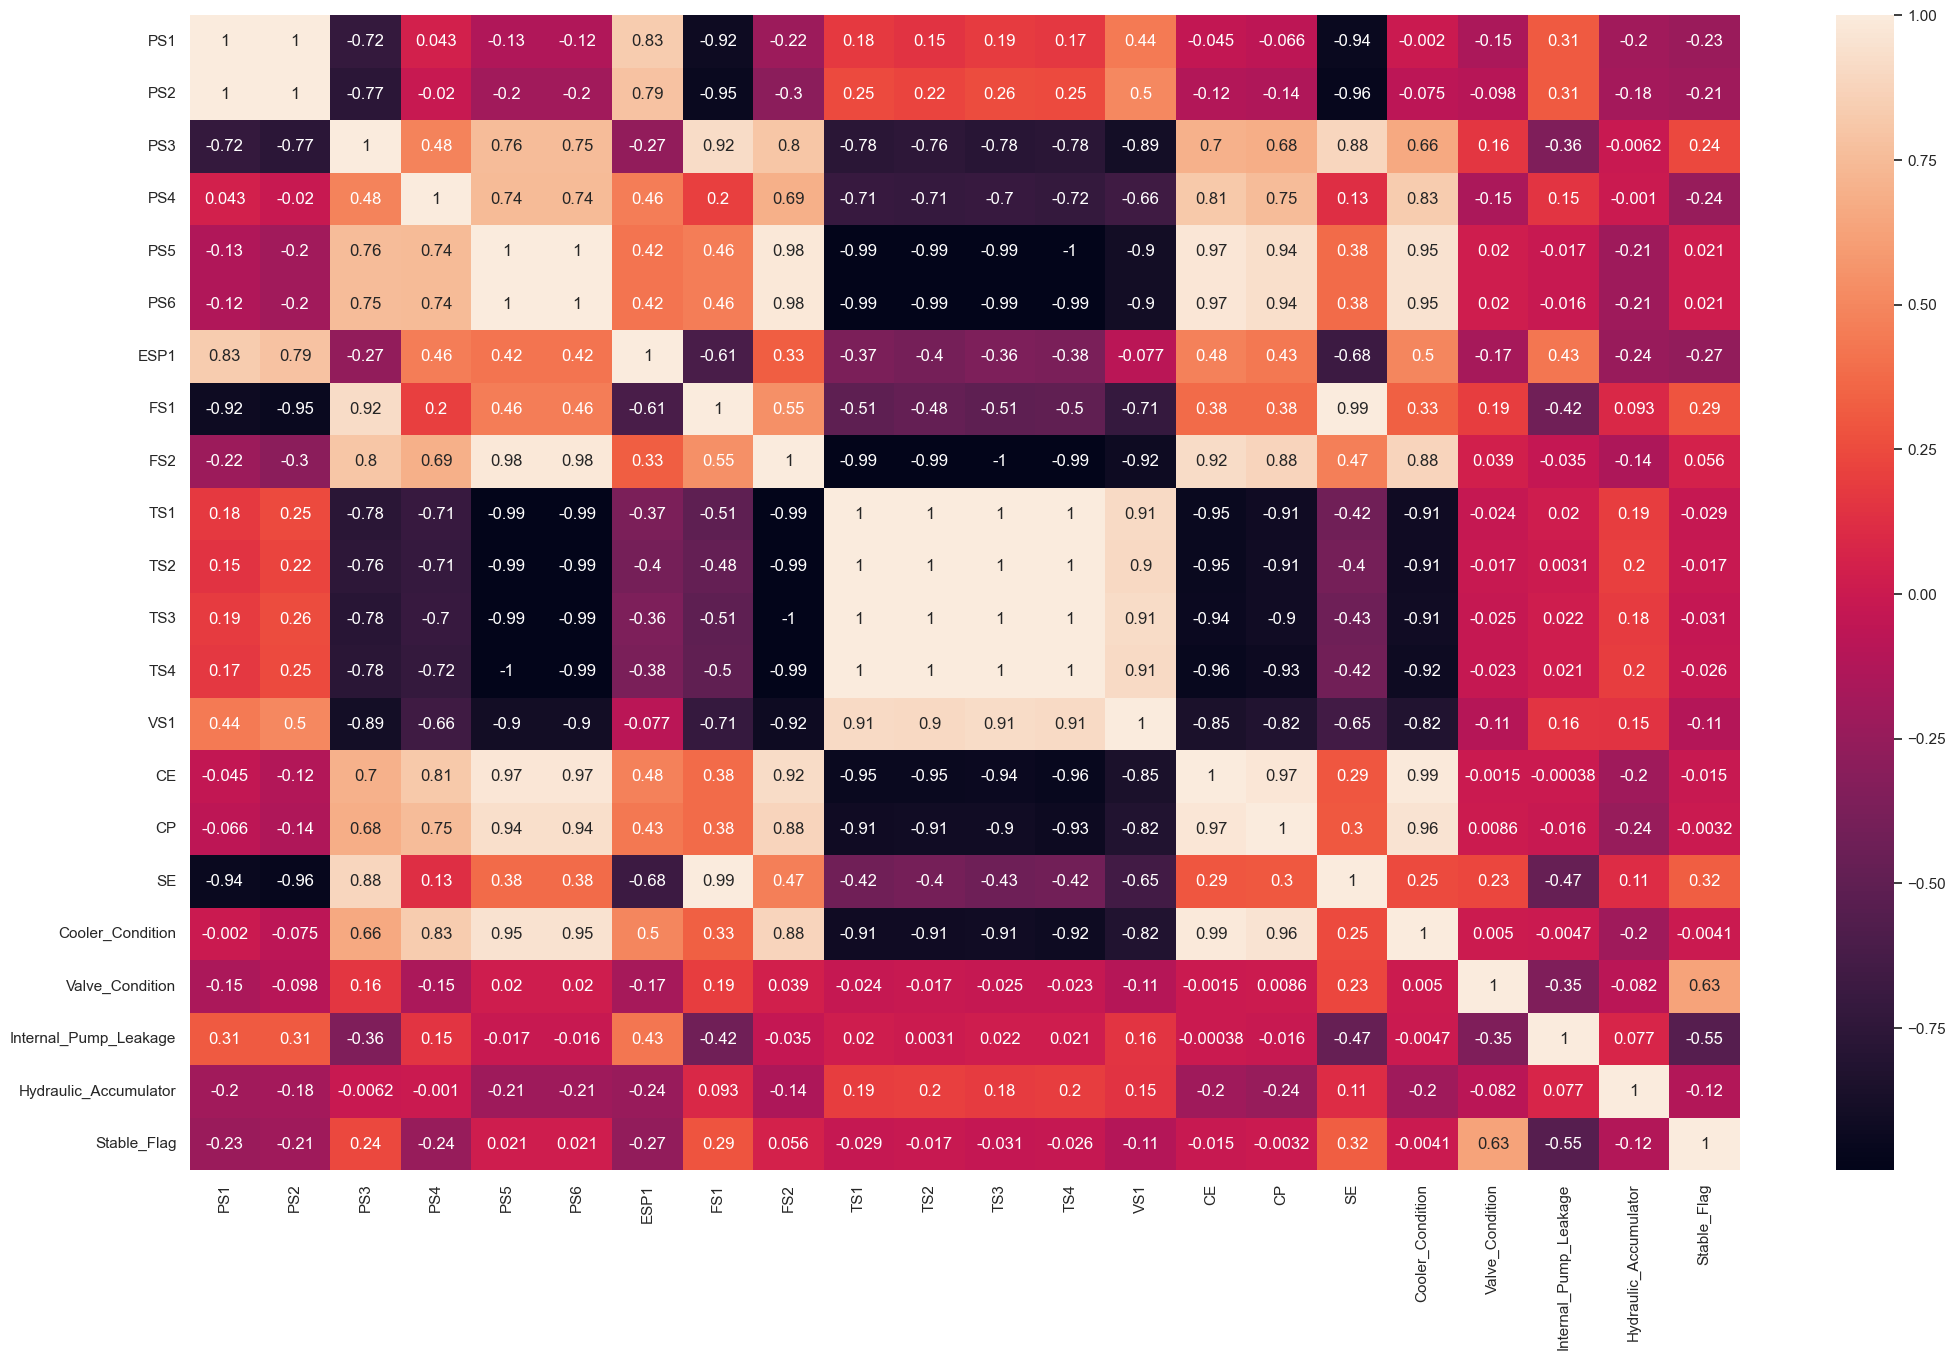

In [61]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [62]:
# fig.savefig("corr.png")

In [63]:
df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
Cooler_Condition,-0.002000,-0.075386,0.662852,0.832446,0.949962,0.950316,0.497514,0.330446,0.881340,-0.910865,...,-0.922572,-0.818256,0.991943,0.956220,0.249273,1.000000,0.004952,-0.004656,-0.203954,-0.004105
CE,-0.044862,-0.119934,0.697820,0.814459,0.973995,0.974220,0.475030,0.376376,0.919353,-0.945977,...,-0.955987,-0.852222,1.000000,0.974136,0.293130,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,-0.065850,-0.137819,0.680701,0.752728,0.936972,0.937112,0.433904,0.382178,0.876955,-0.912048,...,-0.926772,-0.821073,0.974136,1.000000,0.303047,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458


In [64]:
df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

C:\Users\SystemDynamicsLab\AppData\Local\Temp\ipykernel_14416\3326543227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)


In [65]:
df_final_corr_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
CE,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,0.949962,0.020317,-0.016579,-0.209262,0.021458
FS2,0.881340,0.038651,-0.034926,-0.139471,0.055942
PS4,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS3,0.662852,0.163278,-0.355070,-0.006242,0.237027
ESP1,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,0.330446,0.190141,-0.421702,0.092695,0.288568
SE,0.249273,0.231354,-0.469243,0.112756,0.324695


# 3- Data Preprocessing

In [66]:
x=df_final.iloc[:,:-5]

In [67]:
x.head(2)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.57695,39.601350,1.86275,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.56585,25.786433,1.25555,59.335617


In [68]:
y=df_final.iloc[:,-5:]

In [69]:
y.head(2)

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0


In [70]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

In [71]:
target_1

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
        ...  
2200    100.0
2201    100.0
2202    100.0
2203    100.0
2204    100.0
Name: Cooler_Condition, Length: 2205, dtype: float64

In [72]:
x.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


## data splitting target-1

### target incidence

In [73]:
round((target_1.value_counts(normalize=True)),4)    #cooler condition is normal

100.0    0.3361
3.0      0.3320
20.0     0.3320
Name: Cooler_Condition, dtype: float64

In [74]:
x2 = df.iloc[:, [6,7]]

In [75]:
x2

,ESP1,FS1
0,2538.929167,6.709815
1,2531.498900,6.715315
2,2519.928000,6.718522
3,2511.541633,6.720565
4,2503.449500,6.690308
...,...,...
2200,2543.911033,6.689930
2201,2543.411333,6.692182
2202,2542.729767,6.693277
2203,2544.046333,6.684128


In [76]:
X_train,X_test,y_train,y_test=train_test_split(x2,target_3,test_size=0.2,random_state=1)

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
# X is your feature matrix, y is your target column



# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {test_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/100
56/56 [==============================] - 1s 5ms/step - loss: 0.9807 - accuracy: 0.5567 - val_loss: 0.8551 - val_accuracy: 0.5828
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.7802 - accuracy: 0.6298 - val_loss: 0.7428 - val_accuracy: 0.6689
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6893 - val_loss: 0.5828 - val_accuracy: 0.6939
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7426 - val_loss: 0.4364 - val_accuracy: 0.8662
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.9025 - val_loss: 0.3575 - val_accuracy: 0.9184
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.9427 - val_loss: 0.2815 - val_accuracy: 0.9637
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9643 - val_loss: 0.2088 - val_accuracy: 0.9683
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9717 - val_loss: 0.0651 - val_accuracy: 0.9683
Epoch 60/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9705 - val_loss: 0.0655 - val_accuracy: 0.9683
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9688 - val_loss: 0.0695 - val_accuracy: 0.9705
Epoch 62/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9694 - val_loss: 0.0656 - val_accuracy: 0.9728
Epoch 63/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9728 - val_loss: 0.0633 - val_accuracy: 0.9683
Epoch 64/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9683 - val_loss: 0.0645 - val_accuracy: 0.9683
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9717 - val_loss: 0.0677 - val_accuracy: 0.9683
Epoch 

14/14 [==============================] - 0s 996us/step


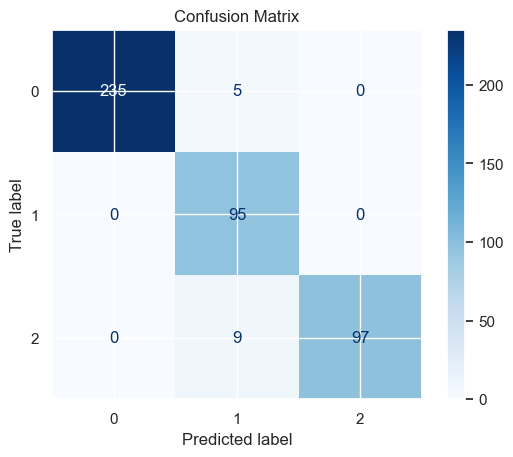

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [82]:
model.save('my_model31.h5') 

C:\Users\SystemDynamicsLab\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9728 - val_loss: 0.0603 - val_accuracy: 0.9683
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9717 - val_loss: 0.0591 - val_accuracy: 0.9728
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9688 - val_loss: 0.0659 - val_accuracy: 0.9705
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9751 - val_loss: 0.0597 - val_accuracy: 0.9705
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9711 - val_loss: 0.0629 - val_accuracy: 0.9728
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9705 - val_loss: 0.0819 - val_accuracy: 0.9660
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9762 - val_loss: 0.0620 - val_accuracy: 0.9705
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9722 - val_loss: 0.0722 - val_accuracy: 0.9683
Epoch 60/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9762 - val_loss: 0.0552 - val_accuracy: 0.9728
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9717 - val_loss: 0.0615 - val_accuracy: 0.9705
Epoch 62/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9751 - val_loss: 0.0566 - val_accuracy: 0.9773
Epoch 63/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9705 - val_loss: 0.0559 - val_accuracy: 0.9773
Epoch 64/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9728 - val_loss: 0.0558 - val_accuracy: 0.9773
Epoch 65/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9762 - val_loss: 0.0687 - val_accuracy: 0.9751
Epoch 

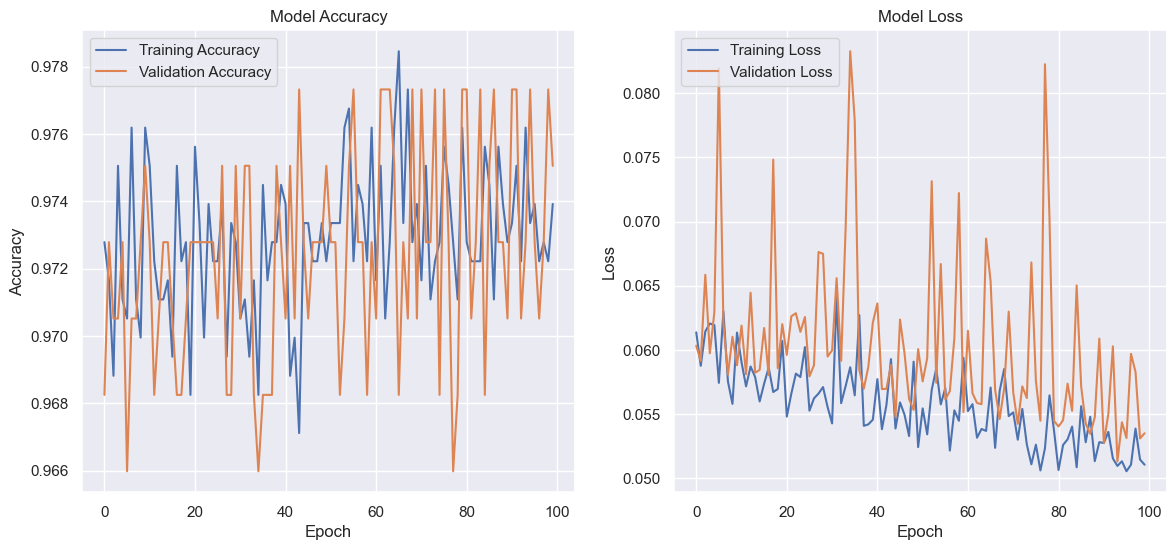

In [79]:
# Increase the epochs to 100
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Load your pre-trained base model (2-class model)
base_model = tf.keras.models.load_model('my_model5.h5')

# Step 2: Freeze the base model layers so they won't be retrained
for layer in base_model.layers:
    layer.trainable = False  # Freeze all layers to preserve knowledge from 2-class training

# Step 3: Get the output from the last layer of the base model
base_model_output = base_model.layers[-1].output

# Step 4: Add shared layers for feature extraction (optional, if needed)
x = Dense(128, activation='relu')(base_model_output)
x = Dropout(0.3)(x)

# Step 5: Add task-specific output layers
# Output for binary classification (2 classes)
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)

# Output for multi-class classification (3 classes)
multi_class_output = Dense(3, activation='softmax', name='multi_class_output')(x)

# Step 6: Create the multi-task learning model
model = Model(inputs=base_model.input, outputs=[binary_output, multi_class_output])

# Step 7: Compile the model with different loss functions for each task
model.compile(optimizer='adam',
              loss={'binary_output': 'binary_crossentropy', 
                    'multi_class_output': 'sparse_categorical_crossentropy'},
              metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'})

# Step 8: Train the model on both tasks
# Assuming you have separate datasets: X_train_binary, y_train_binary (2-class), and X_train_multi, y_train_multi (3-class)
history = model.fit(X_train, 
                    {'binary_output': y_train, 'multi_class_output': y_train},
                    epochs=100, batch_size=32, validation_split=0.2)

# You can adjust dataset batches to balance training on both tasks


NameError: name 'X_train' is not defined

14/14 [==============================] - 0s 1ms/step


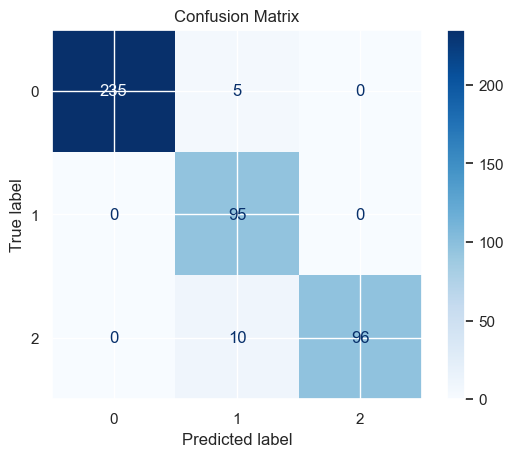

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# Predict the labels for the test set
y_pred = np.argmax(model2.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [253]:
model2.save('my_model4.h5') 

C:\Users\SystemDynamicsLab\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
